## Outliers
Observation which deviates so much from other observations as to arouse suspicion it was generated by a different mechanism

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

In [ ]:
#Visualization styling code
sns.set_context('talk')

In [10]:
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
1. Visualize 

<AxesSubplot:xlabel='tip'>

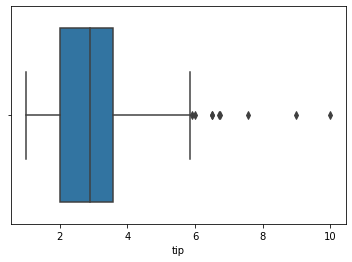

1. Box plot
Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

<AxesSubplot:xlabel='tip'>

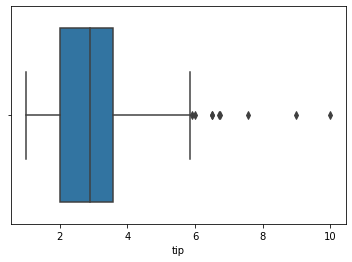

In [11]:
sns.boxplot(x='tip', data=df_tips)

<AxesSubplot:xlabel='tip', ylabel='Count'>

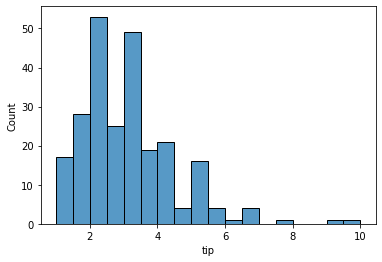

In [12]:
sns.histplot(df_tips['tip'])

2. Descriptive Analysis

In [16]:
df_tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [19]:
print(f"Min: {int(df_tips['tip'].min())}")
print(f"25%: {int(df_tips['tip'].quantile(q=[.25]).iloc[-1])}")
print(f"Median: {int(df_tips['tip'].median())}")
print(f"75%: {int(df_tips['tip'].quantile(q=[.75]).iloc[-1])}")
print(f"Max: {int(df_tips['tip'].max())}")
print(f"Mean: {df_tips['tip'].mean()}")
print(f"Std dev: {df_tips['tip'].std()}")
print(f"Variance: {df_tips['tip'].var()}")
print(f"Skewness: {scipy.stats.skew(df_tips['tip'])}")
print(f"Kurtosis: {scipy.stats.kurtosis(df_tips['tip'])}")
print("")
# Percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df_tips['tip'].quantile(q=[.01, .05, .95, .99]))


Min: 1
25%: 2
Median: 2
75%: 3
Max: 10
Mean: 2.99827868852459
Std dev: 1.3836381890011822
Variance: 1.914454638062471
Skewness: 1.4564266884221506
Kurtosis: 3.5495519893455114

Percentiles 1%, 5%, 95%, 99%


0.01    1.0000
0.05    1.4400
0.95    5.1955
0.99    7.2145
Name: tip, dtype: float64

### Analysing How to detect Outliers?
1. Diffrence between max and mean is greater
2. Kurtosis > 3
3. Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
4. Data points, three or more standard deviation away from mean are considered outlier
5. Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier

### How to remove Outliers?

### 1. Deleting observations: 
We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

In [ ]:
## Method 1 : IQR
Q1=df_tips['tip'].quantile(.25)
Q3=df_tips['tip'].quantile(.75)
IQR=Q3-Q1
df_tips['tip'] = df_tips.tip[~((df_tips.tip < (Q1 - 1.5 * IQR)) |(df_tips.tip > (Q3 + 1.5 * IQR)))]

In [ ]:
## Method 2 : By Capping- Better check it out and possibly remove that single outlier.
value = df_tips['tip'].quantile([.99])
p = value.iloc[0]
df_tips = df_tips[df_tips['tip'] < p]

### 2. Transforming and binning values:
Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values

<AxesSubplot:xlabel='tip', ylabel='Count'>

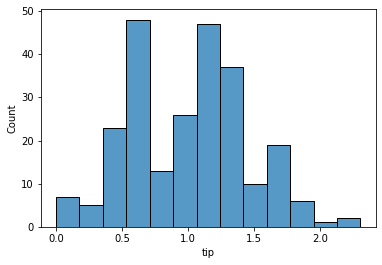

In [24]:
sns.histplot(np.log(df_tips['tip']))

In [25]:
np.log(df_tips['tip']).describe()

count    244.000000
mean       1.002538
std        0.436161
min        0.000000
25%        0.693147
50%        1.064687
75%        1.270444
max        2.302585
Name: tip, dtype: float64

### 3. Imputing: 
Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.

### 4. Treat separately: 
If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.

In [29]:
## Count no of outliers
df_tips.tip[(df_tips.tip < (Q1 - 1.5 * IQR)) |(df_tips.tip > (Q3 + 1.5 * IQR))].shape

(9,)

Although there is a significant number of data point distant from the upper quartile, I believe this is the case that those are not outliers, their values are significant for the target classification. Not removing any others.